*********

## Question 1 (20 points): 

Make a **new file** (either a Jupyter Notebook or Spyder `.py` file) and name it `lab2_submission.ipynb`. Write some code to answer the following questions:

* a) Which **county** had the most **human** caused wildfires **>50 acres**? (HINT: use the `FIPS_NAME` column)
* b) Which **month** had the most **natural** caused wildfires **>100 acres**?
* c) How many fires **>200 acres** have an **undetermined** cause (e.g. `Missing data/not specified/undetermined`?
* d) What is the name, date, and county of the **largest sized fire**?
* e) How many wildfires in **Lane County** were **>50 acres**?

*Remember, focus on adapting the example code rather than writing your own from scratch.*
**************



In [2]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# Define data filepath
pathname = '/Users/ivanduse/Dropbox (University of Oregon)/GDS/labs/lab2/lab2data/'


# Read data
df = gpd.read_file(pathname + 'or_1992-2018.shp') # 'df' stands for DataFrame

In [4]:
# Find column labels
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYS', 'SOURCE_S_1',
       'NWCG_REPOR', 'NWCG_REP_1', 'NWCG_REP_2', 'SOURCE_REP', 'SOURCE_R_1',
       'LOCAL_FIRE', 'LOCAL_INCI', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_PL',
       'ICS_209__1', 'MTBS_ID', 'MTBS_FIRE_', 'COMPLEX_NA', 'FIRE_YEAR',
       'DISCOVERY_', 'DISCOVER_1', 'DISCOVER_2', 'NWCG_CAUSE', 'NWCG_GENER',
       'NWCG_CAU_1', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_', 'LATITUDE', 'LONGITUDE', 'OWNER_DESC', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'geometry'],
      dtype='object')

### Question 1a. Which county had the most human caused wildfires >50 acres?


In [5]:
# Filter fires larger than 50 acres
df_large50 = df[df['FIRE_SIZE'] > 50]

In [6]:
# Filter large fires that were caused by Humans
df_large50_human = df_large50[df_large50['NWCG_CAUSE'] == 'Human']

In [7]:
# Find county
df_large50_human['FIPS_NAME']

4          Curry County
84                 None
86                 None
93                 None
97                 None
              ...      
66883       Lake County
66920              None
66966    Malheur County
66999              None
67015       Lake County
Name: FIPS_NAME, Length: 971, dtype: object

In [8]:
##Group by county
#Number of 50 acre human caused fires in each county
large50_human_county_count = df_large50_human.iloc[:,0].groupby(df_large50_human['FIPS_NAME']).count()

In [9]:
large50_human_county_count

FIPS_NAME
Adams County          1
Baker County         22
Benton County         5
Clackamas County      4
Clatsop County        3
Columbia County       1
Coos County           8
Crook County         10
Curry County          9
Deschutes County     22
Douglas County       40
Gilliam County       19
Grant County         28
Harney County        31
Hood River County     5
Jackson County       25
Jefferson County     30
Josephine County     20
Klamath County       34
Klickitat County      2
Lake County          18
Lane County          18
Lincoln County        6
Linn County           5
Malheur County       49
Marion County         7
Morrow County        11
Multnomah County      3
Polk County           4
Sherman County       20
Tillamook County      1
Umatilla County      40
Union County         14
Wallowa County       10
Wasco County         71
Washington County     2
Wheeler County       28
Yamhill County        1
Name: OBJECTID, dtype: int64

In [10]:
#answer
print(large50_human_county_count.idxmax(), large50_human_county_count.max())

Wasco County 71


#### Wasco County has the most with 71 Human started fires

### b) Which **month** had the most **natural** caused wildfires **>100 acres**?

In [11]:
# Filter fires larger than 100 acres
df_large100 = df[df['FIRE_SIZE'] > 100]

# Filter large fires that were caused by Humans
df_large100_natural = df_large100[df_large100['NWCG_CAUSE'] == 'Natural']

In [12]:
datetime = pd.to_datetime(df_large100_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
datetime

56      2008-07-02
89      2000-07-22
95      2007-08-31
96      2003-06-29
109     2007-07-13
           ...    
67007   2017-08-29
67008   2011-09-15
67014   2014-09-16
67017   2013-08-07
67022   2016-08-17
Name: DISCOVERY_, Length: 1164, dtype: datetime64[ns]

In [13]:
df_large100_natural['datetime'] = datetime # Sorry about the warning, extra credit if someone can fix this!


/Users/ivanduse/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [14]:
# Find acres of wildfire for each year
monthsoffire = df_large100['FIRE_SIZE'].groupby(df_large100_natural['datetime'].dt.month).sum()

In [17]:
monthsoffire

datetime
4.0        7223.00
5.0        4318.80
6.0      409057.30
7.0     4280522.35
8.0     2841708.62
9.0      187842.70
10.0       7421.00
Name: FIRE_SIZE, dtype: float64

In [18]:
#answer
print(monthsoffire.idxmax(), monthsoffire.max())

7.0 4280522.35


#### July has the most with 4280522 natural fires

### c) How many fires >200 acres have an undetermined cause (e.g. Missing data/not specified/undetermined?

In [19]:
# Filter fires larger than 200 acres
df_large200 = df[df['FIRE_SIZE'] > 200]

In [20]:
#Filter large fires that were caused by Humans
df_large200_undetermined = df_large200[df_large200['NWCG_CAUSE'] == 'Missing data/not specified/undetermined']

In [21]:
df_large200

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,FIRE_SIZE,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
56,372910.0,385224,FWS-2008ORUMRD9SR,FED,FWS-FMIS,FWS,USORUMR,Umatilla National Wildlife Refuge,ORUMR,Umatilla National Wildlife Refuge,...,558.7,E,45.903611,-119.551111,FWS,OR,None,None,None,POINT (-119.55111 45.90361)
86,364396.0,375453,FWS-2000WAMNR1442,FED,FWS-FMIS,FWS,USWAMNR,McNary National Wildlife Refuge,WAMNR,McNary National Wildlife Refuge,...,300.0,E,45.916667,-119.116667,PRIVATE,OR,None,None,None,POINT (-119.11667 45.91667)
93,365347.0,376556,FWS-2001WAMNR1780,FED,FWS-FMIS,FWS,USWAMNR,McNary National Wildlife Refuge,WAMNR,McNary National Wildlife Refuge,...,300.0,E,45.943611,-119.068056,FWS,OR,None,None,None,POINT (-119.06806 45.94361)
96,343109.0,351884,W-115262,FED,DOI-WFMI,BLM,USORVAD,Vale District,ORVAD,Vale District,...,3100.0,F,45.960478,-118.937810,BLM,OR,Umatilla,41059,Umatilla County,POINT (-118.93781 45.96048)
97,371451.0,383537,FWS-2006WAMNRC1ZG,FED,FWS-FMIS,FWS,USWAMNR,McNary National Wildlife Refuge,WAMNR,McNary National Wildlife Refuge,...,8000.0,G,45.983333,-118.966667,FWS,WA,None,None,None,POINT (-118.96667 45.98333)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67005,1904509.0,400026067,W-714547,FED,DOI-WFMI,BLM,USORBUD,Burns District,ORBUD,Burns District,...,4494.0,F,42.141100,-118.629700,BLM,OR,Harney,41025,Harney County,POINT (-118.62970 42.14110)
67008,1467508.0,201110156,W-630207,FED,DOI-WFMI,BLM,USORBUD,Burns District,ORBUD,Burns District,...,2000.0,F,42.238900,-118.491203,BLM,OR,Harney,41025,Harney County,POINT (-118.49120 42.23890)
67014,1732966.0,300023327,W-675627,FED,DOI-WFMI,BLM,USORBUD,Burns District,ORBUD,Burns District,...,14700.0,G,42.404400,-118.667800,BLM,OR,Harney,41025,Harney County,POINT (-118.66780 42.40440)
67017,1647080.0,201777325,W-663571,FED,DOI-WFMI,BLM,USORBUD,Burns District,ORBUD,Burns District,...,807.0,E,42.437500,-119.078600,BLM,OR,Harney,41025,Harney County,POINT (-119.07860 42.43750)


In [22]:
# Find acres of wildfire for each year
acre200_undeterminedfires = df_large200['FIRE_SIZE'].groupby(df_large200_undetermined['NWCG_CAUSE']).sum()

In [23]:
#answer
print(acre200_undeterminedfires.idxmax(), acre200_undeterminedfires.max())

Missing data/not specified/undetermined 31913.0


#### There have been 31913 fires >200 with an undetermined cause

### d) What is the name, date, and county of the largest sized fire? 

In [24]:
df['FIRE_SIZE'].max()


558198.3

In [25]:
df_largest = df[df['FIRE_SIZE'] == 558198.3]

In [26]:
df_largest

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,FIRE_SIZE,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
66964,1578392.0,201508655,W-649635,FED,DOI-WFMI,BLM,USORVAD,Vale District,ORVAD,Vale District,...,558198.3,G,42.391894,-117.893687,BLM,OR,Malheur,41045,Malheur County,POINT (-117.89369 42.39189)


In [27]:
datetime = pd.to_datetime(df_largest['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
datetime

66964   2012-07-08
Name: DISCOVERY_, dtype: datetime64[ns]

In [28]:
print(df_largest['FIRE_NAME'] , df_largest['FIRE_SIZE'] , datetime, df_largest['FIPS_NAME'])

66964    LONG DRAW
Name: FIRE_NAME, dtype: object 66964    558198.3
Name: FIRE_SIZE, dtype: float64 66964   2012-07-08
Name: DISCOVERY_, dtype: datetime64[ns] 66964    Malheur County
Name: FIPS_NAME, dtype: object


#### The Largest Fire in Oregon was the Long Draw Fire in Malheur County on July 8th, 2012.

### e) How many wildfires in Lane County were >50 acres?


In [29]:
# Filter fires larger than 50 acres
df_large = df[df['FIRE_SIZE'] > 50]


In [30]:
# Filter large fires that were in Lane County
df_large_Lane = df_large[df_large['FIPS_NAME'] == 'Lane County']

In [31]:
#answer
df_large_Lane['OBJECTID'].count()

33

#### Lane County has had 33 fires greater than 50 acres

## Question 2 (20 points): changes



In [33]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

# Define product
acs = products.ACS(2019)

#### a) Write some more code in lab2_submission.ipynb to produce a chloropleth map for a city, county or state showing a Census variable (or derived variable) of your choice. Consider choosing a place or variable that inetrests you.

I started with finding the total monthly housing for people living in Gallatin County, MT. Home of Bozeman, a city that is rapidly growing and pricing out locals. In Southern Gallatin County, the BigSky ski resort is an attraction to the super rich. It is home to many elite housing clubs such as the [Yellowstone Club](https://www.celebritynetworth.com/articles/entertainment-articles/inside-ultra-exclusive-celebrity-enclave-yellowstone-club/#:~:text=It%20is%20the%20playground%20of,Erin%20Andrews%20got%20married%20here).

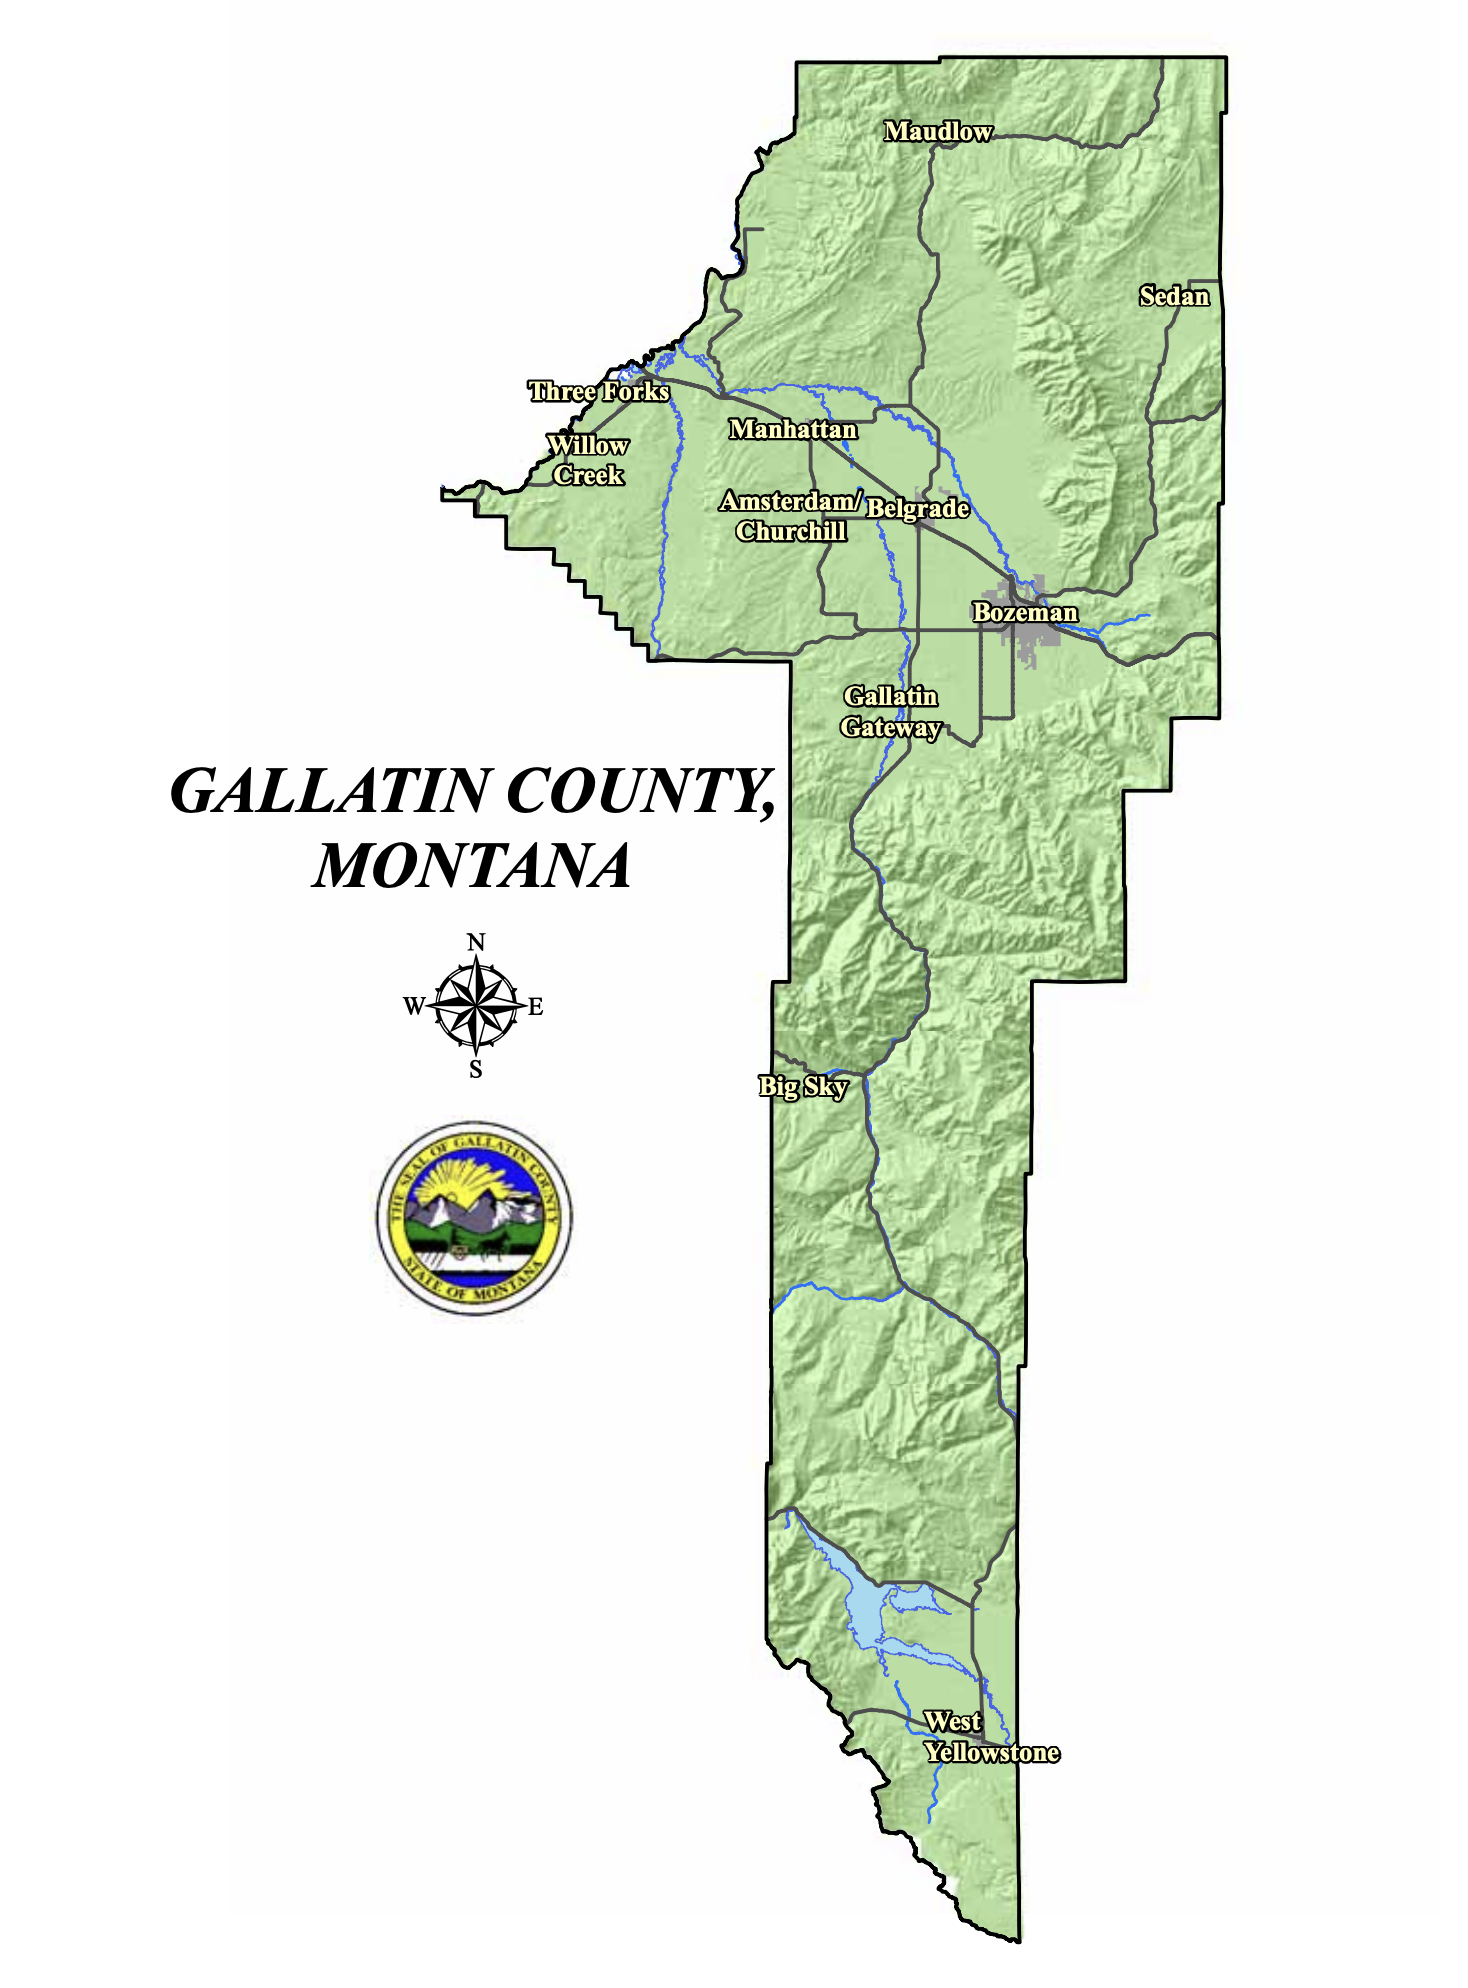

In [34]:
# Print list of tables
acs.filter_tables('HOUSING', by='description')

,description,columns
table_name,,
B25001,HOUSING UNITS,[B25001_001E]
B25008,TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY ...,"[B25008_001E, B25008_002E, B25008_003E]"
B25010,AVERAGE HOUSEHOLD SIZE OF OCCUPIED HOUSING UNI...,"[B25010_001E, B25010_002E, B25010_003E]"
B25026,TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY ...,"[B25026_001E, B25026_002E, B25026_003E, B25026..."
B25033,TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY ...,"[B25033_001E, B25033_002E, B25033_003E, B25033..."
B25047,PLUMBING FACILITIES FOR ALL HOUSING UNITS,"[B25047_001E, B25047_002E, B25047_003E]"
B25048,PLUMBING FACILITIES FOR OCCUPIED HOUSING UNITS,"[B25048_001E, B25048_002E, B25048_003E]"
B25051,KITCHEN FACILITIES FOR ALL HOUSING UNITS,"[B25051_001E, B25051_002E, B25051_003E]"
B25052,KITCHEN FACILITIES FOR OCCUPIED HOUSING UNITS,"[B25052_001E, B25052_002E, B25052_003E]"


In [35]:
# Print list of variables
acs.filter_variables('B25105')

,label,concept,predicateType,group,limit,predicateOnly,attributes,required
B25105_001E,Estimate!!Median monthly housing costs,MEDIAN MONTHLY HOUSING COSTS (DOLLARS),int,B25105,0,NaN,"B25105_001EA,B25105_001M,B25105_001MA",NaN


In [36]:
# Download data
gallatin_housing = products.ACS(2019).from_county('Gallatin County, MT', level='tract',
                                        variables=['B25105_001E']) # don't worry about the deprecation message!

/Users/ivanduse/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/ivanduse/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/ivanduse/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future

In [37]:
# Calculate some stats
gallatin_housing['B25105_001E'].describe()

count      22.000000
mean     1164.500000
std       285.753432
min       664.000000
25%      1008.500000
50%      1148.500000
75%      1386.500000
max      1774.000000
Name: B25105_001E, dtype: float64

<AxesSubplot:>

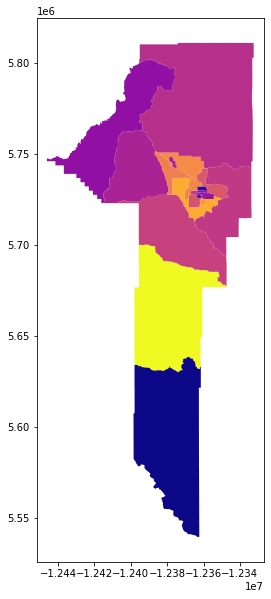

In [38]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
gallatin_housing.plot('B25105_001E', ax=ax, cmap='plasma')



<AxesSubplot:>

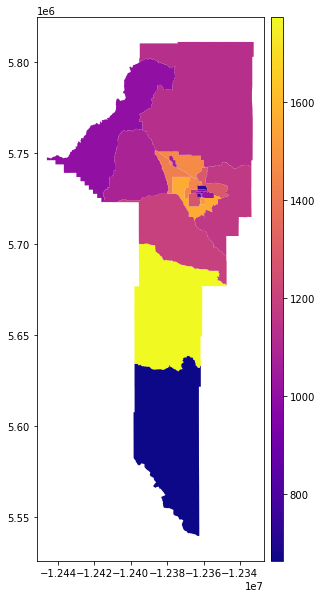

In [39]:
gallatin_housing['gallating_housing'] = gallatin_housing['B25105_001E']

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

gallatin_housing.plot('gallating_housing', ax=ax, cmap='plasma', legend=True, cax=cax)

Most Expensive housing prices are in the Big Sky region home the the megalopolis sku resort and village. Then the ranches and area directly outside bozeman. Finally, the most affordable houses are the houses in Bozeman propper and the cheapest area is the Southern most tract covering West Yellowstone.

#### Switching gears I wanted to see housing prices against population density..



In [40]:
# Download data
gallatin_pop = products.ACS(2019).from_county('Gallatin County, MT', level='tract',
                                        variables=['B01003_001E']) # don't worry about the deprecation message!

/Users/ivanduse/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/ivanduse/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/ivanduse/opt/anaconda3/envs/lab2/lib/python3.8/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future

In [41]:

gallatin_pop['B01003_001E'].describe()

count       22.000000
mean      4911.954545
std       3238.077685
min       1434.000000
25%       2718.250000
50%       4037.500000
75%       5622.750000
max      14648.000000
Name: B01003_001E, dtype: float64

<AxesSubplot:>

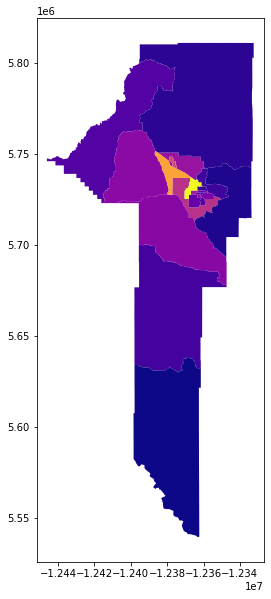

In [42]:
# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))
gallatin_pop.plot('B01003_001E', ax=ax, cmap='plasma')

This plot shows population in Gallatin County tracts.

<AxesSubplot:>

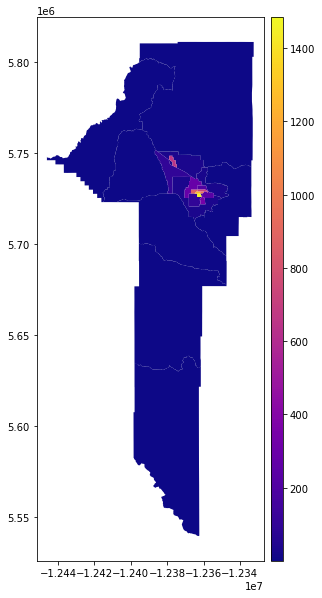

In [43]:
gallatin_pop['pop_density'] = gallatin_pop['B01003_001E'] / (gallatin_pop['geometry'].area / 1e+6)

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

gallatin_pop.plot('pop_density', ax=ax, cmap='plasma', legend=True, cax=cax)

This plot shows population density. As you can see the population center Bozeman and the city of Belgrade to the Northewast are the only locations with any density per tract.

<AxesSubplot:>

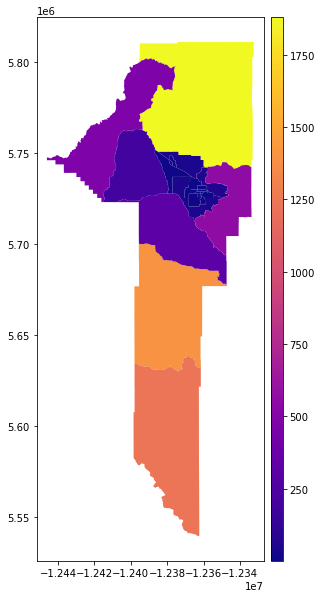

In [45]:
gallatin_housing['housecost_pop'] = (gallatin_housing['B25105_001E'] / gallatin_pop['pop_density'])

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

gallatin_housing.plot('housecost_pop', ax=ax, cmap='plasma', legend=True, cax=cax)

This figure counts housing cost per population density. As you can see Bozeman is the cheapest houses per population density, while The ranches and larger plots to the north and south are significantly more expensive. I am not sure if this is the best metric because it does not account for the amount of lots in each tract.